### Kaygorodov A. MEPHI 2020 29.05.2020


## Time Series and Group Operations
Complete the tasks below. Please turn in a single Jupyter notebook named 8_first_last.ipynb (substitute your first and last name). Please run Kernel > Restart & Run All on your notebook before turning in.

Precipitation in La Jolla
For this assignment, we will use a file containing daily precipitation data in La Jolla from February 2009 to November 2018, which were downloaded from NOAA using "standard" (imperial) units (inches for precipitation, feet for elevation). Download the file from GitHub.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### A. Set up the file
- Import the CSV file as a Pandas DataFrame with default header and index.
- Change the 'DATE' column to timestamps using pd.datetime(). Alternatively, import the CSV file with parse_dates set to the columns you want to parse as datetime.
- What was the maximum daily precipitation (in inches) during this time period and when was it?

In [2]:
df = pd.read_csv('la_jolla_precip_daily.csv.1', parse_dates=['DATE'])

In [3]:
df.sort_values(['PRCP'])

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.00,",,N",0.0,",,N"
2241,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2015-05-06,0.00,",,N",0.0,",,N"
2242,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2015-05-07,0.00,"T,,N",NaN,NaN
2245,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2015-05-10,0.00,",,N",0.0,",,N"
2246,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2015-05-11,0.00,",,N",0.0,",,N"
...,...,...,...,...,...,...,...,...,...,...
3211,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-01-09,1.55,",,N",NaN,NaN
290,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-12-08,2.00,",,N",NaN,NaN
2895,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2017-02-18,2.02,",,N",NaN,NaN
2905,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2017-02-28,2.45,",,N",NaN,NaN


The maximum daily precipitation was in (22.12.2010) and equal to (3.35)

#### B. Explore the dataset

1. We don't need the columns 'SNOW' and 'SNOW_ATTRIBUTES' because there was no recorded snow in the dataset. Delete those columns "in place".

2. Find out about the sampling stations. Notice that the column values are similar between rows except 'DATE' and 'PRCP'. Explore these other columns using three different commands (we may not have covered all of them yet, but they are easy to use and you can always google them):
    - Use the value_counts() method for each of these columns: 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION'. There should only be one cateogory for each calculation because all the data come from the same station. To see what output looks like for a more diverse series, use the value_counts() method on 'PRCP' and 'PRCP_ATTRIBUTES'.
    - Make a DataFrame with just the columns 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION' and use the method drop_duplicates() to see all the unique combinations of values in those five columns.
    - Create a groupby object using groupby('STATION'), then use the count() method on that groupby object to count the number of values for each station.

3. Create columns for 'YEAR', 'MONTH', 'DAY', and 'DAY_OF_YEAR'. Hint: use attributes such as the .year attribute, or use a regular expression, with a list comprehension.

In [4]:
df.drop(['SNOW', 'SNOW_ATTRIBUTES'], inplace=True, axis=1)
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N"
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N"
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N"
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N"
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N"
...,...,...,...,...,...,...,...,...
3509,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-05,0.0,",,N"
3510,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-06,0.0,",,N"
3511,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-07,0.0,",,N"
3512,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-08,0.0,",,N"


In [5]:
print('STATION\n', df['STATION'].value_counts(), end='\n\n')
print('NAME\n', df['NAME'].value_counts(), end='\n\n')
print('LATITUDE\n', df['LATITUDE'].value_counts(), end='\n\n')
print('LONGITUDE\n', df['LONGITUDE'].value_counts(), end='\n\n')
print('ELEVATION\n', df['ELEVATION'].value_counts(), end='\n\n')


print('output for PRCP:\n', df['PRCP'].value_counts())

STATION
 US1CASD0030    3514
Name: STATION, dtype: int64

NAME
 LA JOLLA 2.1 SE, CA US    3514
Name: NAME, dtype: int64

LATITUDE
 32.8257    3514
Name: LATITUDE, dtype: int64

LONGITUDE
 -117.2501    3514
Name: LONGITUDE, dtype: int64

ELEVATION
 149.7    3514
Name: ELEVATION, dtype: int64

output for PRCP:
 0.00    3011
0.01     110
0.02      68
0.03      38
0.04      25
        ... 
0.67       1
2.45       1
0.47       1
0.26       1
0.23       1
Name: PRCP, Length: 89, dtype: int64


In [6]:
df_unique = df[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']].drop_duplicates()
df_unique

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7


In [7]:
df_unique.groupby('STATION').count()

,NAME,LATITUDE,LONGITUDE,ELEVATION
STATION,,,,
US1CASD0030,1,1,1,1


In [8]:
[print(time, '|', time.year, time.month, time.day, time.dayofyear) for time in df['DATE'][:5]]

2009-02-18 00:00:00 | 2009 2 18 49
2009-02-19 00:00:00 | 2009 2 19 50
2009-02-20 00:00:00 | 2009 2 20 51
2009-02-21 00:00:00 | 2009 2 21 52
2009-02-22 00:00:00 | 2009 2 22 53


[None, None, None, None, None]

In [9]:
df['YEAR'] = [time.year for time in df['DATE']]
df['MONTH'] = [time.month for time in df['DATE']]
df['DAY'] = [time.day for time in df['DATE']]
df['DOY'] = [time.dayofyear for time in df['DATE']]
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR,MONTH,DAY,DOY
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",2009,2,18,49
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",2009,2,19,50
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",2009,2,20,51
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",2009,2,21,52
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",2009,2,22,53
...,...,...,...,...,...,...,...,...,...,...,...,...
3509,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-05,0.0,",,N",2018,11,5,309
3510,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-06,0.0,",,N",2018,11,6,310
3511,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-07,0.0,",,N",2018,11,7,311
3512,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2018-11-08,0.0,",,N",2018,11,8,312


#### C. Plot precipitation versus time
1. Use the Matplotlib function plot() to plot precipitation versus date as a single line, using a single color from ColorBrewer or xkcd (via Seaborn). Save your plot as a PDF file.
2. Plot precipitation versus day of year for each year separately, with each year as a different colored line, the x-axis going from the beginning to the end of the year, and a legend indicating the year. Hint: use the 'DAY_OF_YEAR' and 'YEAR' columns you created in B3. Color using a qualitative color palette from Seaborn or ColorBrewer (via Seaborn). Save your plot as a PDF file.
3. Create a set of subplots with a grid of 2 columns and enough rows to have one subplot per year (e.g., to show 10 years, your set of subplots would be 5 by 2). Plot precipitation versus day of year with each year as a separate subplot. Save your figure as a PDF file.

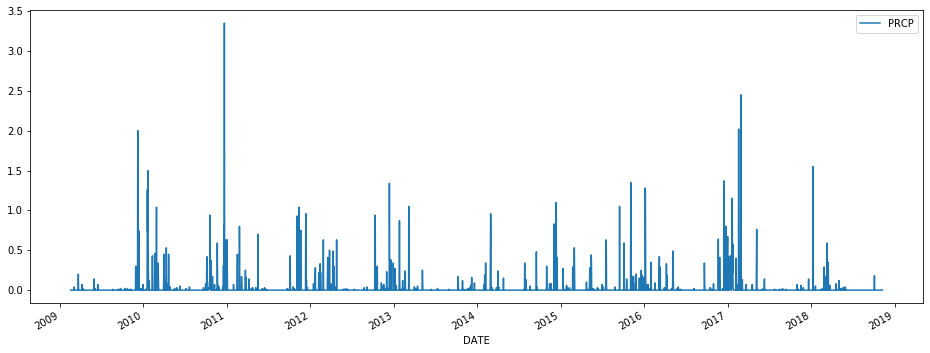

In [10]:
plot = df[['DATE', 'PRCP']].set_index('DATE').plot(figsize=(16,6))
plot.get_figure().savefig('DATE_PRCP_plot.pdf', format='pdf')

In [11]:
! ls

DATE_PRCP_plot.pdf  La_jolla.ipynb		 SUB_plot.pdf
DOY_PRCP_plot.pdf   la_jolla_precip_daily.csv.1


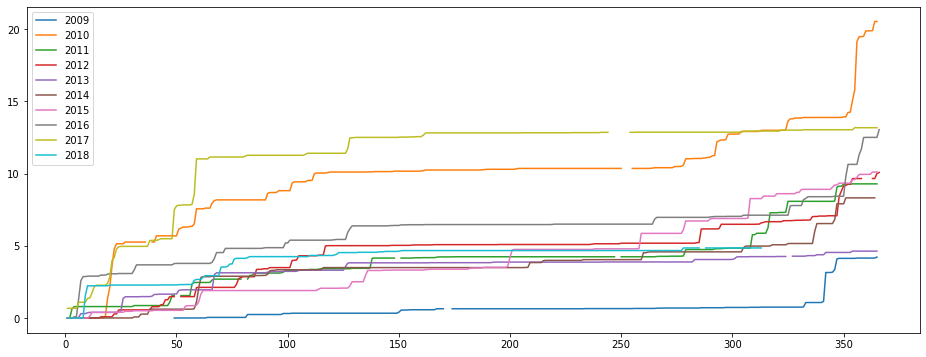

In [12]:
plot2 = pd.DataFrame(range(366)).set_index(0)
for year in df['YEAR'].unique():
    yr = df[df['YEAR']==year].set_index('DOY')
    plot2 = pd.concat([plot2, yr['PRCP']], axis=1, join='outer').rename(columns={'PRCP':str(year)})
plot2 = plot2.cumsum().plot(figsize=(16,6))
plot2.get_figure().savefig('DOY_PRCP_plot.pdf', format='pdf')

In [13]:
! ls

DATE_PRCP_plot.pdf  La_jolla.ipynb		 SUB_plot.pdf
DOY_PRCP_plot.pdf   la_jolla_precip_daily.csv.1


In [14]:
dfs=[]
plot2 = pd.DataFrame(range(366)).set_index(0)
for year in df['YEAR'].unique():
    yr = df[df['YEAR']==year].set_index('DOY')
    dfs.append(pd.concat([plot2, yr['PRCP']], axis=1, join='outer').rename(columns={'PRCP':str(year)}))

len(dfs)

10

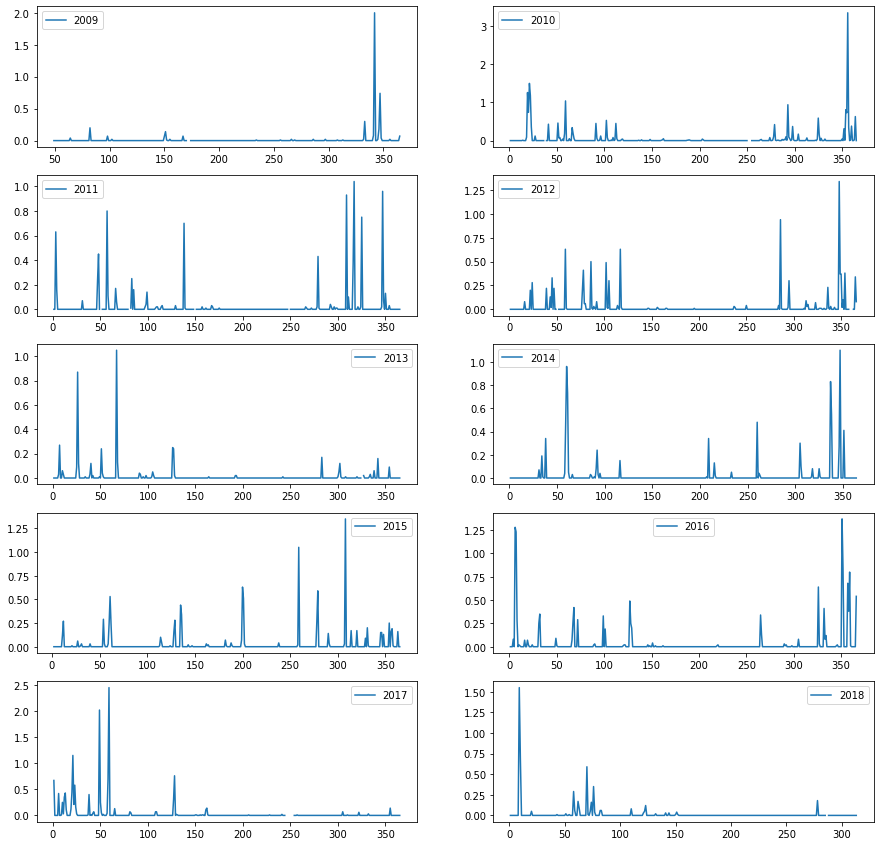

In [15]:
nrow, ncol = 5, 2
plot3, axes = plt.subplots(nrow, ncol, figsize=(15,15))
i=0
for r in range(nrow):
    for c in range(ncol):
        dfs[i].plot(ax=axes[r,c])
        i += 1
#plot3.get_figure().savefig('SUB_plot.pdf', format='pdf')
plot3.savefig("SUB_plot.pdf")

In [16]:
!ls

DATE_PRCP_plot.pdf  La_jolla.ipynb		 SUB_plot.pdf
DOY_PRCP_plot.pdf   la_jolla_precip_daily.csv.1


#### D. Plot distributions of the precipitation data
1. Plot a histogram of precipitation values using the Matplotlib function hist().
2. Plot a histogram with kernel density and rugplot with the Seaborn function distplot(). Play around with the settings to make a histogram that represents the data well.
3. Use groupby to group the data by year or by month. Which year was the rainiest? Which month was the rainiest?
4. Make boxplots by year and by month using the Seaborn function boxplot(). Hint: If you make a boxplot of your DataFrame without grouping, the boxplots will be centered on zero, because there are so many days with zero precipitation. Instead, use groupby to group the data by year and month (use a list containing these columns), set as_index=False, average over those groups, and save this as a new DataFrame; then use this for your boxplots.

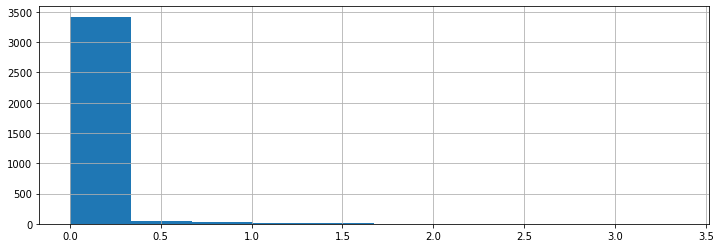

In [17]:
df['PRCP'].hist(figsize=(12,4))

(0, 1)

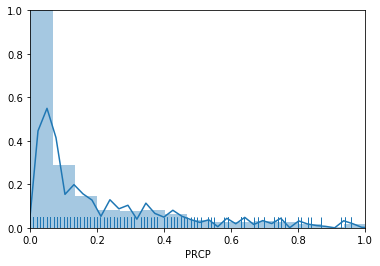

In [92]:
#???
plot = sns.distplot(df['PRCP'], kde=True, rug=True,  hist=True, kde_kws={'bw':0.01})
plot.set_xlim(0,1)
plot.set_ylim(0,1)

In [19]:
prcp_per_year = []
for year in df.groupby('YEAR'):
    prcp_y = round(sum(list(year[1]['PRCP'])), 3)
    #print('In year', year[0], 'PRCP = ', prcp_y)
    prcp_per_year.append(prcp_y)
    
prcp_per_month = []
for year in df.groupby('YEAR'):
    for month in year[1].groupby('MONTH'):
        prcp_per_month.append((year[0], month[0],round(sum(list(month[1]['PRCP'])), 3)))

list_of_prcp = [prcp[2] for prcp in prcp_per_month]
max_prcp = max(list_of_prcp)
index = list_of_prcp.index(max_prcp)


print(f'max PRCP for the year equal to {max(prcp_per_year)} and it was in {2009 + prcp_per_year.index(max(prcp_per_year))}')

print(f'the most rainy month was in {prcp_per_month[index][1]}/{prcp_per_month[index][0]} \
and euqal to {prcp_per_month[index][2]}')

max PRCP for the year equal to 20.54 and it was in 2010
the most rainy month was in 12/2010 and euqal to 6.65


In [20]:
year_for_boxplot = prcp_per_year
month_for_boxplot = [prcp[2] for prcp in prcp_per_month]

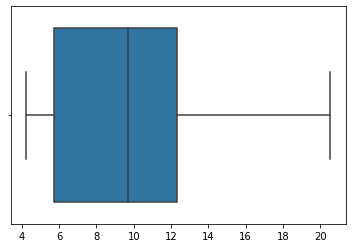

In [21]:
#sns.boxplot([list(el[1]['PRCP']) for el in df.groupby('YEAR')][0])
sns.boxplot(year_for_boxplot)

month = 1 [5.26, 0.86, 0.56, 1.47, 0.07, 0.5, 3.33, 4.96, 2.28]
month = 2 [0.0, 2.3, 1.6, 1.56, 0.48, 1.05, 0.38, 0.45, 6.06, 0.39]
month = 3 [0.24, 0.62, 0.65, 1.29, 1.18, 1.83, 1.02, 1.09, 0.25, 1.58]
month = 4 [0.09, 1.93, 0.3, 1.6, 0.18, 0.54, 0.16, 0.55, 0.14, 0.08]
month = 5 [0.21, 0.06, 0.74, 0.02, 0.51, 0.0, 1.26, 1.03, 1.12, 0.33]
month = 6 [0.1, 0.08, 0.09, 0.05, 0.01, 0.0, 0.06, 0.02, 0.29, 0.01]
month = 7 [0.0, 0.11, 0.0, 0.01, 0.04, 0.35, 1.37, 0.0, 0.01, 0.0]
month = 8 [0.01, 0.0, 0.0, 0.05, 0.01, 0.2, 0.04, 0.03, 0.03, 0.0]
month = 9 [0.04, 0.05, 0.04, 0.04, 0.0, 0.54, 1.07, 0.47, 0.01, 0.0]
month = 10 [0.04, 2.51, 0.56, 1.31, 0.36, 0.0, 1.03, 0.15, 0.0, 0.18]
month = 11 [0.34, 0.97, 3.24, 0.3, 0.08, 0.58, 2.02, 1.28, 0.17, 0.0]
month = 12 [3.15, 6.65, 1.21, 3.29, 0.31, 3.16, 1.2, 4.65, 0.14]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3a5730fbd0>,
            0
 0   2.143333
 1   1.427000
 2   0.975000
 3   0.557000
 4   0.528000
 5   0.071000
 6   0.189000
 7   0.037000
 8   0.226000
 9   0.614000
 10  0.898000
 11  2.640000)

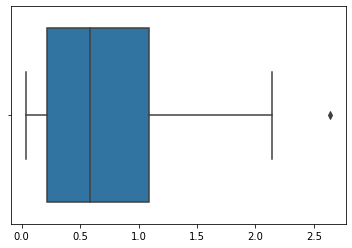

In [22]:
months = []
for month in pd.DataFrame(prcp_per_month).groupby(1):
    print(f'month = {month[0]}', list(month[1][2]))
    months.append(sum(list(month[1][2]))/len(list(month[1][2])))

month = pd.DataFrame(months)
sns.boxplot(month), month

#### E. Pivoting, stacking and unstacking
1. Use pivot_table() to produce a new DataFrame, where rows=years and columns=months, containing the mean precipitation of each month.
2. Draw a heatmap of years x months where each square is a month colored by mean precipitation. Adjust the colormap to highlight months with heavy precipitation. Hint: Seaborn's heatmap() function makes this very easy.
3. Stack the monthly precipitation table using stack(). View the values for 2017. Which month had the most precipitation in 2017? Describe the distribution statistics for all months using describe(). How many months are included in this dataset? What was the median month (daily average) value in this time period?
4. Use unstack() to stack precipitation pivot table by month and then year. View the values for December. Which year had the wettest December?

In [23]:
pt = df[['YEAR', 'MONTH', 'PRCP']]
pt = pd.pivot_table(pt, columns='MONTH', values='PRCP', index='YEAR')
pt

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2009,NaN,0.000000,0.007742,0.003000,0.006774,0.003704,0.000000,0.000323,0.001333,0.001290,0.011333,0.101613
2010,0.169677,0.088462,0.020000,0.064333,0.001935,0.002667,0.003548,0.000000,0.001923,0.080968,0.032333,0.214516
2011,0.027742,0.061538,0.022414,0.010000,0.025517,0.003000,0.000000,0.000000,0.001429,0.018065,0.108000,0.039032
2012,0.018065,0.057778,0.041613,0.053333,0.000645,0.001667,0.000323,0.001613,0.001333,0.042258,0.010000,0.121852
2013,0.047419,0.017143,0.038065,0.006000,0.016452,0.000333,0.001290,0.000323,0.000000,0.011613,0.002857,0.010000
2014,0.002258,0.037500,0.059032,0.018000,0.000000,0.000000,0.011290,0.006452,0.018000,0.000000,0.019333,0.105333
2015,0.016667,0.013571,0.032903,0.005333,0.040645,0.002000,0.044194,0.001290,0.035667,0.033226,0.067333,0.038710
2016,0.107419,0.015517,0.035161,0.018333,0.033226,0.000667,0.000000,0.000968,0.015667,0.004839,0.042667,0.150000
2017,0.160000,0.216429,0.008065,0.004667,0.036129,0.009667,0.000323,0.000968,0.000476,0.000000,0.005667,0.004516


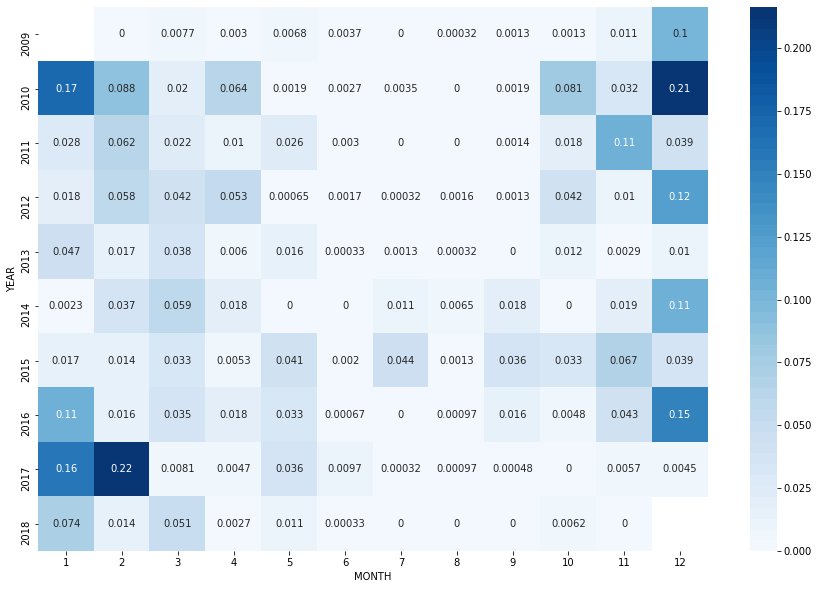

In [24]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(pt, annot=True, cmap=sns.color_palette('Blues', 50))

In [25]:
print(pd.DataFrame(pt.stack())[0].loc[2017])
print(f'2017, max percip month is 2 (Feb)')

MONTH
1     0.160000
2     0.216429
3     0.008065
4     0.004667
5     0.036129
6     0.009667
7     0.000323
8     0.000968
9     0.000476
10    0.000000
11    0.005667
12    0.004516
Name: 0, dtype: float64
2017, max percip month is 2 (Feb)


12 month included.


medial value = 0.019206581386725992 


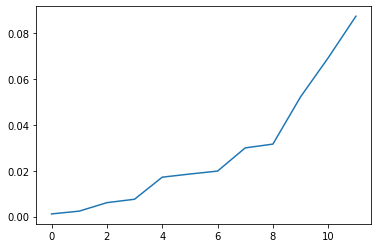

In [74]:
month_means = []
for month in range(1, 13):
    #print(f'MONTH = {month}\n', pt[month].describe())
    month_means.append((pt[month].mean()))
month_meanth_sorted = month_means.sort
mm = np.array(month_means)
plt.plot(np.sort(mm))
print(f'medial value = {np.median(mm)} ', )

In [103]:
pt_stack = pd.DataFrame(pt.stack())
pt_stack

0
YEAR MONTH          
2009 2      0.000000
     3      0.007742
     4      0.003000
     5      0.006774
     6      0.003704
...              ...
2018 7      0.000000
     8      0.000000
     9      0.000000
     10     0.006207
     11     0.000000

[118 rows x 1 columns]

In [114]:
pt_stack.unstack()

0                                                              \
MONTH        1         2         3         4         5         6         7    
YEAR                                                                          
2009        NaN  0.000000  0.007742  0.003000  0.006774  0.003704  0.000000   
2010   0.169677  0.088462  0.020000  0.064333  0.001935  0.002667  0.003548   
2011   0.027742  0.061538  0.022414  0.010000  0.025517  0.003000  0.000000   
2012   0.018065  0.057778  0.041613  0.053333  0.000645  0.001667  0.000323   
2013   0.047419  0.017143  0.038065  0.006000  0.016452  0.000333  0.001290   
2014   0.002258  0.037500  0.059032  0.018000  0.000000  0.000000  0.011290   
2015   0.016667  0.013571  0.032903  0.005333  0.040645  0.002000  0.044194   
2016   0.107419  0.015517  0.035161  0.018333  0.033226  0.000667  0.000000   
2017   0.160000  0.216429  0.008065  0.004667  0.036129  0.009667  0.000323   
2018   0.073548  0.013929  0.050968  0.002667  0.010645  0.000333  0.000000   

                                                         
MONTH        8         9         10        11        12  
YEAR                                                     
2009   0.000323  0.001333  0.001290  0.011333  0.101613  
2010   0.000000  0.001923  0.080968  0.032333  0.214516  
2011   0.000000  0.001429  0.018065  0.108000  0.039032  
2012   0.001613  0.001333  0.042258  0.010000  0.121852  
2013   0.000323  0.000000  0.011613  0.002857  0.010000  
2014   0.006452  0.018000  0.000000  0.019333  0.105333  
2015   0.001290  0.035667  0.033226  0.067333  0.038710  
2016   0.000968  0.015667  0.004839  0.042667  0.150000  
2017   0.000968  0.000476  0.000000  0.005667  0.004516  
2018   0.000000  0.000000  0.006207  0.000000       NaN

the wettest december was in 2010